In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
data = load_breast_cancer()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=3000)
selected_features = []

In [ ]:
data.data.shape

(569, 30)

In [ ]:
perf = []
count = 0

In [ ]:
count

0

In [ ]:
for i in range(X_train.shape[1]):
  
    best_feature = None
    best_perf = 0
    
    
    for j in range(X_train.shape[1]):
        
        if j in selected_features:
            continue
            
        count+=1
        features = selected_features + [j]
        model.fit(X_train[:, features], y_train)
        
        
        y_pred = model.predict(X_test[:, features])
        perf_score = accuracy_score(y_test, y_pred)
        
        
        if perf_score > best_perf:
            best_feature = j
            best_perf = perf_score
            
    print(f'{best_feature} is the selected feature currently and {best_perf} is the obtained accuracy')
    selected_features.append(best_feature)

22 is the selected feature currently and 0.9649122807017544 is the obtained accuracy
0 is the selected feature currently and 0.9736842105263158 is the obtained accuracy
13 is the selected feature currently and 0.9912280701754386 is the obtained accuracy
26 is the selected feature currently and 1.0 is the obtained accuracy
2 is the selected feature currently and 1.0 is the obtained accuracy
3 is the selected feature currently and 1.0 is the obtained accuracy
4 is the selected feature currently and 1.0 is the obtained accuracy
5 is the selected feature currently and 1.0 is the obtained accuracy
6 is the selected feature currently and 1.0 is the obtained accuracy
8 is the selected feature currently and 1.0 is the obtained accuracy
7 is the selected feature currently and 1.0 is the obtained accuracy
9 is the selected feature currently and 1.0 is the obtained accuracy
10 is the selected feature currently and 1.0 is the obtained accuracy
14 is the selected feature currently and 1.0 is the ob

In [ ]:
perf.append(best_perf)

In [ ]:
print(f"Iteration {i+1}: Selected Features = {selected_features}, Performance = {best_perf}")


Iteration 30: Selected Features = [22, 0, 13, 26, 2, 3, 4, 5, 6, 8, 7, 9, 10, 14, 15, 16, 17, 18, 19, 24, 27, 28, 25, 29, 11, 12, 20, 23, 1, 21], Performance = 0.956140350877193


In [ ]:
import numpy as np

# Reshape y_train to have shape (100, 1)
y_train = y_train.reshape((455, 1))

# Print the shapes of X_train and y_train
print("X_train shape:", X_train.shape)  # Output: (100, 10)
print("y_train shape:", y_train.shape) 

X_train shape: (455, 30)
y_train shape: (455, 1)


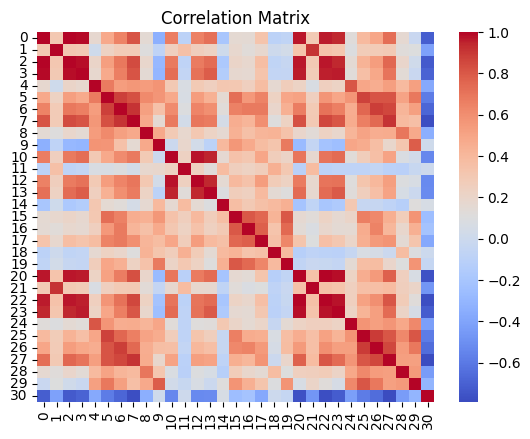

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Reshape y_train to have shape (100, 1)
y_train = y_train.reshape((455, 1))

# Concatenate X_train and y_train along the second axis
data = np.concatenate((X_train, y_train), axis=1)

# Compute the correlation matrix
corr = np.corrcoef(data, rowvar=False)

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=False, cmap='coolwarm', xticklabels=True, yticklabels=True)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Lets Select top 10 features only and then test it on the result
feat = selected_features[:10]

model.fit(X_train[:, feat], y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=3000)

In [ ]:
y_pred = model.predict(X_test[:, feat])
score = accuracy_score(y_test, y_pred)

In [ ]:
score

1.0